In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA, PCA

# Parameters
fs = 1000  # sampling frequency in Hz
T = 200  # time period or duration in seconds
f = 25 # wave frequency in Hz
t = np.linspace(0, T, T * fs) #t = numpy.linspace(start, stop, number of samples)
# samples/sec = frequency. Hence, number of samples = (Total time * frequency)

In [4]:
# Generate signals
squareWave = np.sign(np.sin(2 * np.pi * f * t))  # Square wave
sawtoothWave = 2 * (t*f % 1) - 1  # Sawtooth wave
sineWave = np.sin(2 * np.pi * f * t)  # Sine wave

Text(0, 0.5, 'Amplitude')

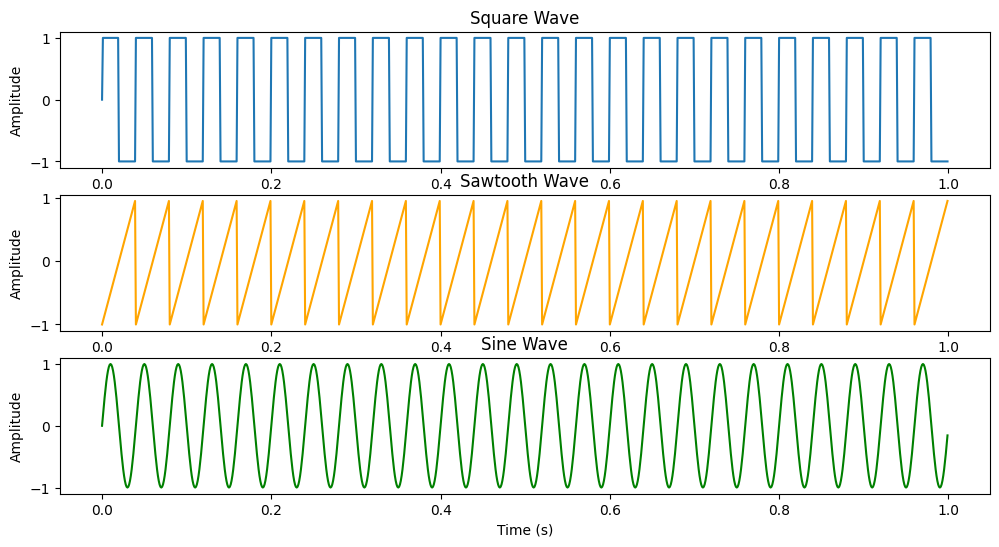

In [6]:
# Plot the signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t[:1000], squareWave[:1000])
plt.title("Square Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t[:1000], sawtoothWave[:1000],color='orange')
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.title("Sine Wave")
plt.plot(t[:1000], sineWave[:1000],color='green')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [8]:
# Standardize the signals
scaler = StandardScaler()
squareWaveStd = scaler.fit_transform(squareWave.reshape(-1, 1)).flatten()
sawtoothWaveStd = scaler.fit_transform(sawtoothWave.reshape(-1, 1)).flatten()
sineWaveStd = scaler.fit_transform(sineWave.reshape(-1, 1)).flatten()

In [10]:
# Add Gaussian noise
def add_noise(signal):
    noise = np.random.normal(0, 0.1, len(signal))
    return signal + noise

squareWaveNoisy = add_noise(squareWaveStd)
sawtoothWaveNoisy = add_noise(sawtoothWaveStd)
sineWaveNoisy = add_noise(sineWaveStd)

In [12]:
# Mix signals
def mix_signals(weights):
    return (weights[0] * squareWaveNoisy +
            weights[1] * sineWaveNoisy +
            weights[2] * sawtoothWaveNoisy)

mix1 = mix_signals([0.2, 0.2, 0.6])
mix2 = mix_signals([0.33, 0.33, 0.34])
mix3 = mix_signals([0.6, 0.2, 0.2])

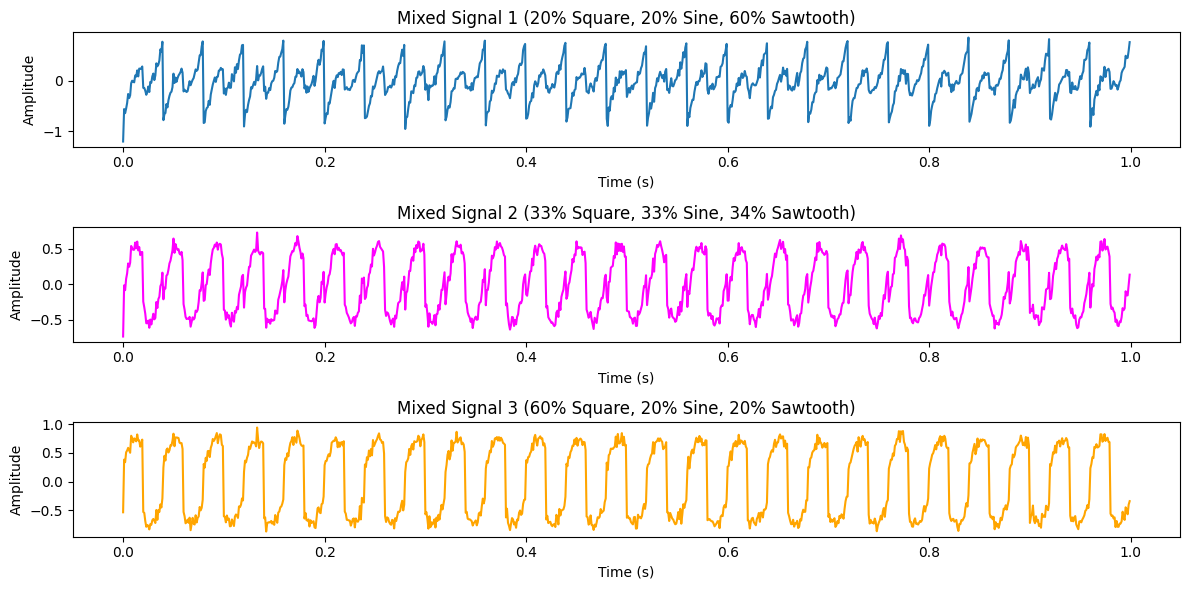

In [24]:
# Plot mixed signals
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t[:1000], mix1[:1000])
plt.title("Mixed Signal 1 (20% Square, 20% Sine, 60% Sawtooth)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t[:1000], mix2[:1000], color='magenta')
plt.title("Mixed Signal 2 (33% Square, 33% Sine, 34% Sawtooth)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(t[:1000], mix3[:1000], color='orange')
plt.title("Mixed Signal 3 (60% Square, 20% Sine, 20% Sawtooth)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [16]:
#!pip install sklearn
#%pip install scikit-learn

In [30]:
# Prepare mixed signals for decomposition
mixedSignals = np.vstack([mix1, mix2, mix3]).T

# Apply ICA
ica = FastICA(n_components=3)
icaComponents = ica.fit_transform(mixedSignals)

# Apply PCA
pca = PCA(n_components=3)
pcaComponents = pca.fit_transform(mixedSignals)

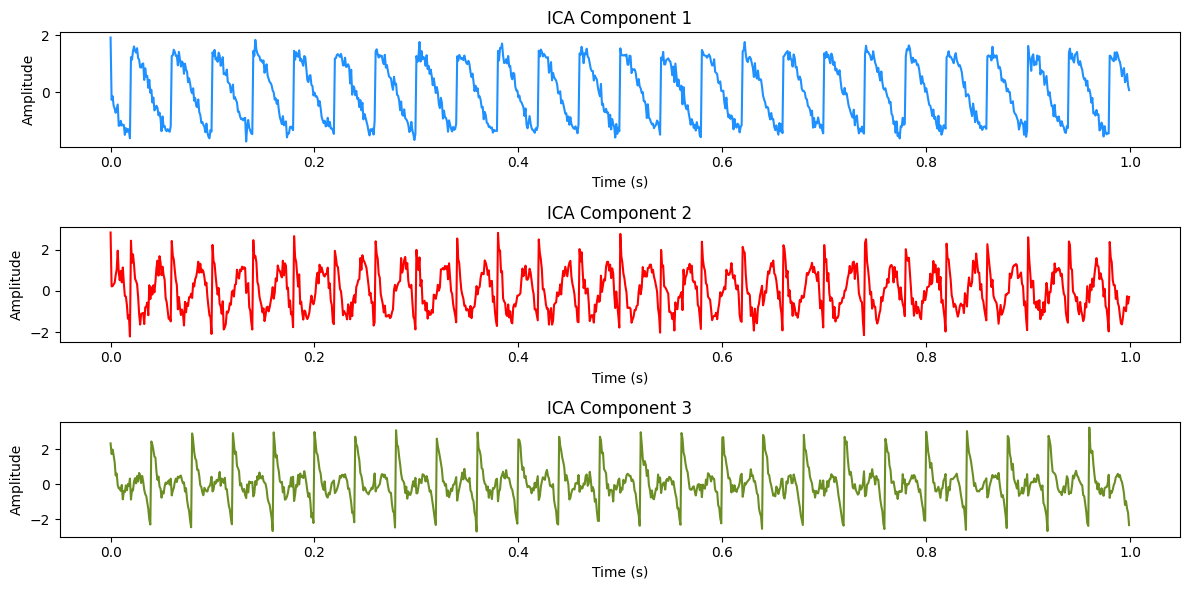

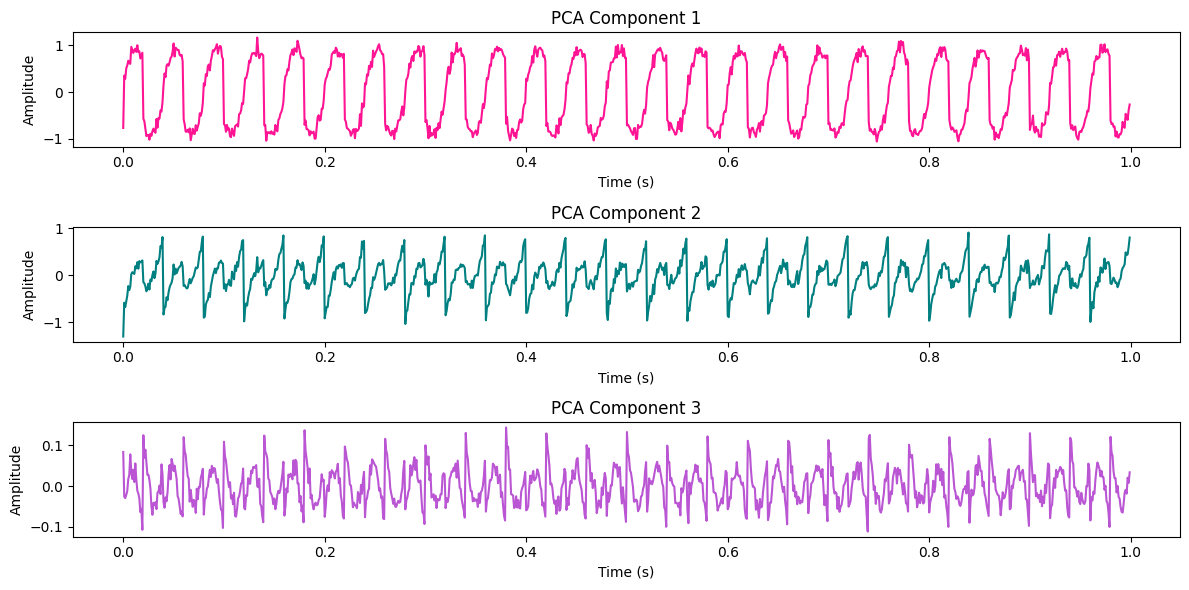

In [42]:
# Plot ICA components
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t[:1000], icaComponents[:1000, 0], color = 'dodgerblue')
plt.title("ICA Component 1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t[:1000], icaComponents[:1000, 1], color = 'red')
plt.title("ICA Component 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(t[:1000], icaComponents[:1000, 2], color = 'olivedrab')
plt.title("ICA Component 3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Plot PCA components
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t[:1000], pcaComponents[:1000, 0], color = 'deeppink')
plt.title("PCA Component 1")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t[:1000], pcaComponents[:1000, 1], color = 'teal')
plt.title("PCA Component 2")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(t[:1000], pcaComponents[:1000, 2], color = 'mediumorchid')
plt.title("PCA Component 3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()